# Data Exploration and Analysis
## Text Classification with Multiple Embeddings - Group 6

**Objective:** Comprehensive exploratory data analysis of SMS Spam Collection dataset

**Requirements:**
- 4+ visualizations (class balance, text length, vocabulary, word clouds)
- Statistical analysis
- Preprocessing strategy definition with justification

---

## 1. Environment Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
import sys
import os

sys.path.append('../src')

from preprocessing import TextPreprocessor, load_spam_data, get_text_statistics

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 100)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [10]:
import nltk
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("✓ NLTK data downloaded")

✓ NLTK data downloaded


## 2. Load Dataset

In [3]:
df = load_spam_data('../data/raw/spam.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Successfully loaded data with latin-1 encoding
Dataset shape: (5572, 5)

Column names: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

First few rows:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


## 3. Dataset Overview and Statistics

In [4]:
print("Dataset Information:")
print("=" * 60)
print(f"\nShape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nUnique values per column:\n{df.nunique()}")

print("\n" + "=" * 60)
print("Label distribution:")
print(df.iloc[:, 0].value_counts())

Dataset Information:

Shape: (5572, 5)

Data types:
v1            str
v2            str
Unnamed: 2    str
Unnamed: 3    str
Unnamed: 4    str
dtype: object

Missing values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Unique values per column:
v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

Label distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


## 4. Visualization 1: Class Distribution

Understanding the balance between spam and ham messages is crucial for model training and evaluation.

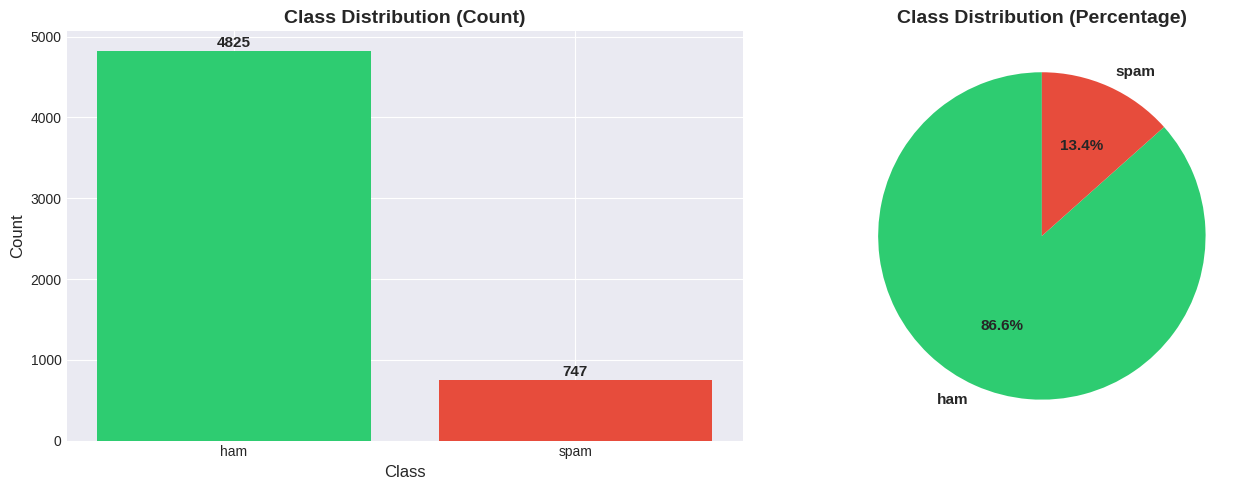


Class Imbalance Ratio: 6.46:1


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

label_col = df.columns[0]
counts = df[label_col].value_counts()
axes[0].bar(counts.index, counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontsize=11, fontweight='bold')

colors = ['#2ecc71', '#e74c3c']
axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClass Imbalance Ratio: {counts.max() / counts.min():.2f}:1")

## 5. Visualization 2: Text Length Analysis

Analyzing message length helps understand the complexity and structure of spam vs. ham messages.

Text Length Statistics by Class:
       count        mean        std   min    25%    50%    75%    max
v1                                                                   
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

Word Count Statistics by Class:
       count       mean        std  min   25%   50%   75%    max
v1                                                              
ham   4825.0  14.200622  11.424511  1.0   7.0  11.0  19.0  171.0
spam   747.0  23.851406   5.811898  2.0  22.0  25.0  28.0   35.0


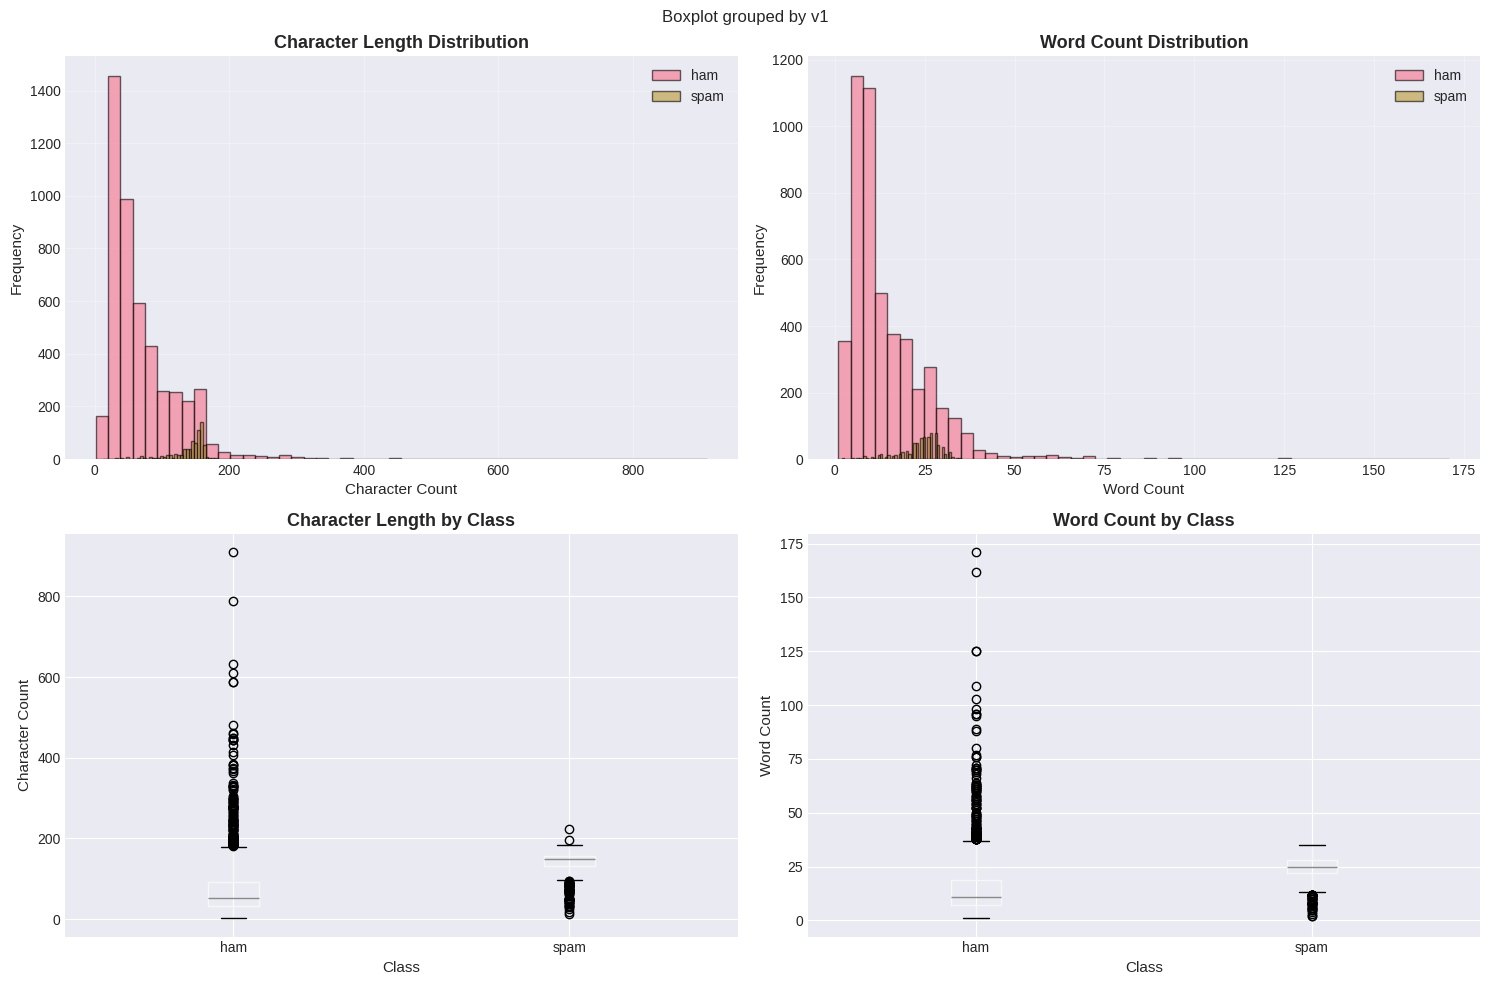

In [6]:
text_col = df.columns[1]
df['text_length'] = df[text_col].str.len()
df['word_count'] = df[text_col].str.split().str.len()

print("Text Length Statistics by Class:")
print("=" * 60)
print(df.groupby(label_col)['text_length'].describe())
print("\nWord Count Statistics by Class:")
print("=" * 60)
print(df.groupby(label_col)['word_count'].describe())

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for label in df[label_col].unique():
    data = df[df[label_col] == label]['text_length']
    axes[0, 0].hist(data, bins=50, alpha=0.6, label=label, edgecolor='black')
axes[0, 0].set_xlabel('Character Count', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Character Length Distribution', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

for label in df[label_col].unique():
    data = df[df[label_col] == label]['word_count']
    axes[0, 1].hist(data, bins=50, alpha=0.6, label=label, edgecolor='black')
axes[0, 1].set_xlabel('Word Count', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Word Count Distribution', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

df.boxplot(column='text_length', by=label_col, ax=axes[1, 0])
axes[1, 0].set_xlabel('Class', fontsize=11)
axes[1, 0].set_ylabel('Character Count', fontsize=11)
axes[1, 0].set_title('Character Length by Class', fontsize=13, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

df.boxplot(column='word_count', by=label_col, ax=axes[1, 1])
axes[1, 1].set_xlabel('Class', fontsize=11)
axes[1, 1].set_ylabel('Word Count', fontsize=11)
axes[1, 1].set_title('Word Count by Class', fontsize=13, fontweight='bold')
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('../results/figures/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Visualization 3: Word Clouds

Word clouds visualize the most frequent words in spam and ham messages.

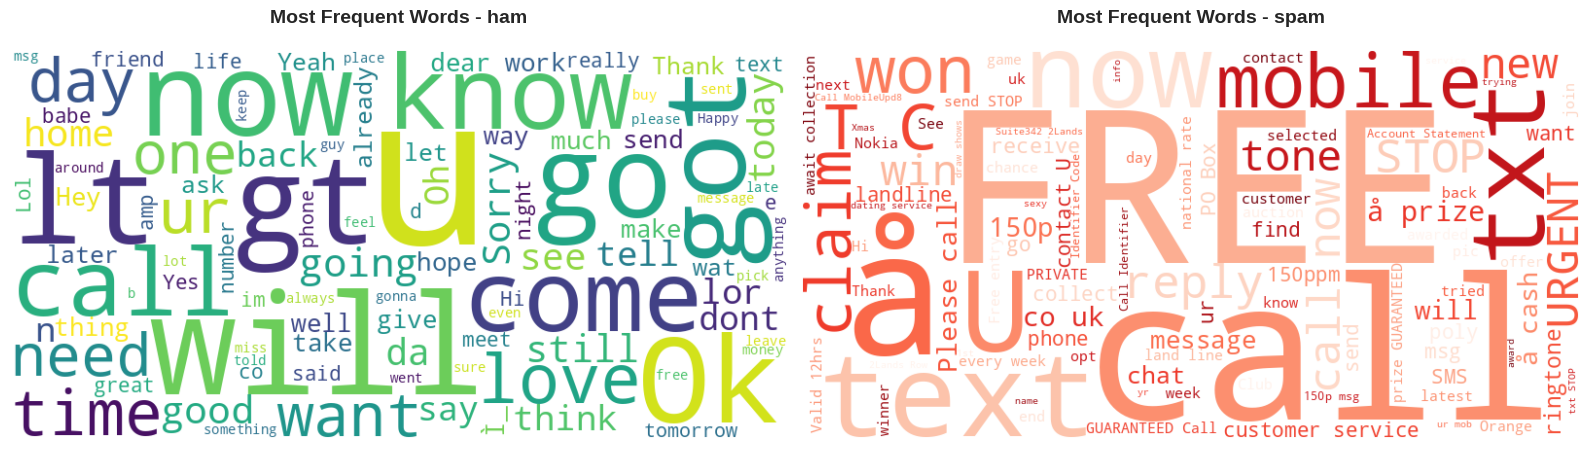

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, label in enumerate(df[label_col].unique()):
    text = ' '.join(df[df[label_col] == label][text_col].astype(str))
    
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap='viridis' if idx == 0 else 'Reds',
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'Most Frequent Words - {label}', 
                       fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/figures/wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Visualization 4: Vocabulary Statistics

Analyzing unique words, vocabulary size, and lexical diversity across classes.

Vocabulary Statistics:

ham:
  Total words: 68,518
  Unique words: 10,882
  Lexical diversity: 0.1588

spam:
  Total words: 17,817
  Unique words: 3,732
  Lexical diversity: 0.2095


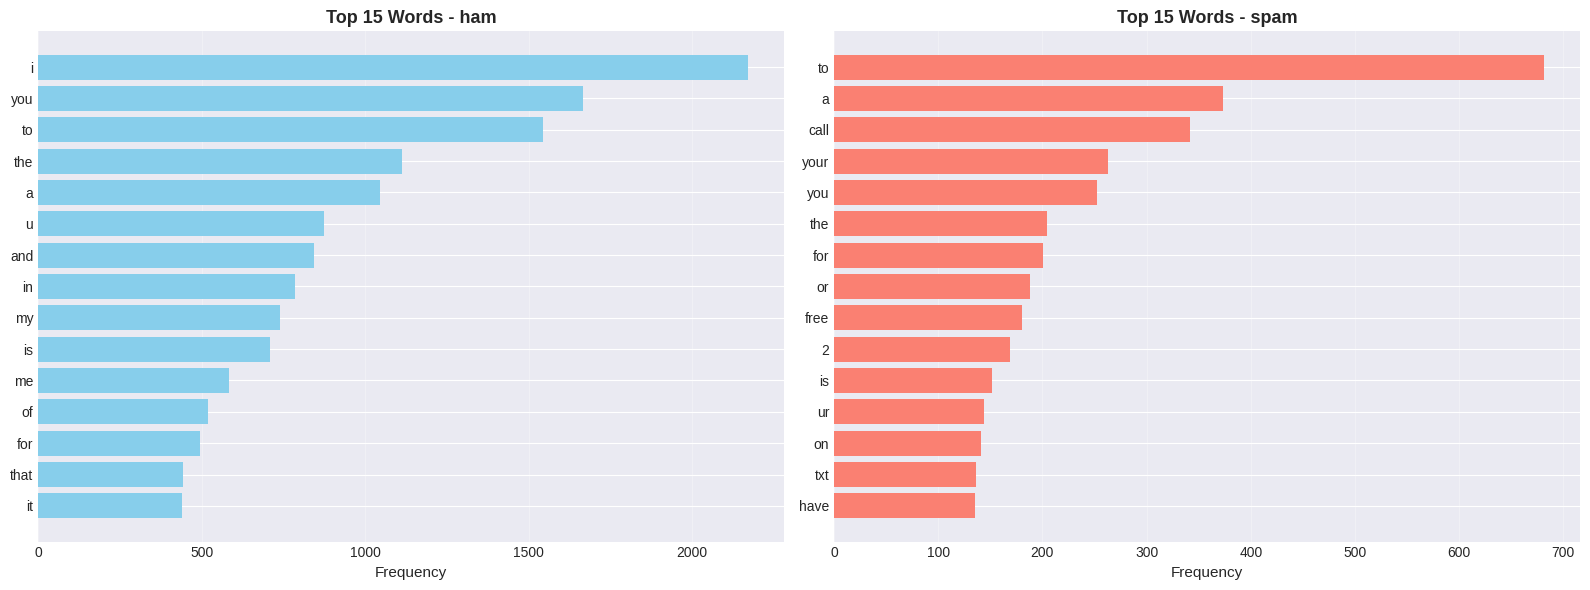

In [8]:
from collections import Counter

vocab_stats = {}
for label in df[label_col].unique():
    texts = df[df[label_col] == label][text_col].astype(str)
    all_words = ' '.join(texts).lower().split()
    
    vocab_stats[label] = {
        'total_words': len(all_words),
        'unique_words': len(set(all_words)),
        'lexical_diversity': len(set(all_words)) / len(all_words),
        'top_20_words': Counter(all_words).most_common(20)
    }

print("Vocabulary Statistics:")
print("=" * 60)
for label, stats in vocab_stats.items():
    print(f"\n{label}:")
    print(f"  Total words: {stats['total_words']:,}")
    print(f"  Unique words: {stats['unique_words']:,}")
    print(f"  Lexical diversity: {stats['lexical_diversity']:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, label in enumerate(vocab_stats.keys()):
    words, counts = zip(*vocab_stats[label]['top_20_words'][:15])
    axes[idx].barh(range(len(words)), counts, color='skyblue' if idx == 0 else 'salmon')
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].set_xlabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Top 15 Words - {label}', fontsize=13, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/vocabulary_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Preprocessing Strategy

Based on our analysis and current literature, we define our preprocessing approach for all team members.

### Shared Preprocessing Pipeline

**Team Decision:** All members will use consistent preprocessing steps:

1. **Lowercase conversion** - Standard practice for text normalization (Jurafsky & Martin, 2023)
2. **URL and email removal** - Reduces noise from non-semantic features
3. **Punctuation removal** - Focus on word-level features
4. **Tokenization** - Using NLTK word tokenizer (Bird et al., 2009)

**Embedding-Specific Adaptations:**

- **TF-IDF:** 
  - Keep stopwords (contextual importance)
  - Use n-grams (1,2) to capture phrases
  - Rationale: Ramos (2003) showed TF-IDF benefits from n-gram features

- **Word2Vec (Skip-gram & CBOW):**
  - Remove stopwords (focus on semantic meaning)
  - Apply lemmatization for vocabulary reduction
  - Rationale: Mikolov et al. (2013) recommends preprocessing for better word embeddings

- **GloVe (optional):**
  - Similar to Word2Vec preprocessing
  - Rationale: Pennington et al. (2014) 

- **FastText (optional):**
  - Minimal preprocessing (leverages subword information)
  - Keep more vocabulary for character-level learning
  - Rationale: Bojanowski et al. (2017)

### References

- Bird, S., Klein, E., & Loper, E. (2009). *Natural Language Processing with Python*. O'Reilly Media.
- Bojanowski, P., Grave, E., Joulin, A., & Mikolov, T. (2017). Enriching word vectors with subword information. *Transactions of the ACL*, 5, 135-146.
- Jurafsky, D., & Martin, J. H. (2023). *Speech and Language Processing* (3rd ed.). Pearson.
- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. *arXiv preprint arXiv:1301.3781*.
- Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global vectors for word representation. *EMNLP*, 1532-1543.
- Ramos, J. (2003). Using TF-IDF to determine word relevance in document queries. *Proceedings of ICML*, 133-142.

## 9. Apply Preprocessing Example

In [11]:
preprocessor = TextPreprocessor(
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True,
    lemmatization=True
)

print("Preprocessing Examples:")
print("=" * 80)
for i in range(3):
    original = df[text_col].iloc[i]
    cleaned = preprocessor.preprocess(original)
    print(f"\nOriginal: {original}")
    print(f"Cleaned:  {cleaned}")
    print("-" * 80)

print("\nApplying preprocessing to full dataset...")
df['cleaned_text'] = df[text_col].apply(preprocessor.preprocess)
df['tokens'] = df[text_col].apply(lambda x: preprocessor.preprocess(x, return_tokens=True))

df.to_csv('../data/processed/spam_preprocessed.csv', index=False)
print(f"✓ Preprocessed data saved to: data/processed/spam_preprocessed.csv")
print(f"✓ Total samples: {len(df)}")
print(f"✓ Features: {df.columns.tolist()}")

Preprocessing Examples:

Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  go jurong point crazy available bugis n great world la e buffet cine got amore wat
--------------------------------------------------------------------------------

Original: Ok lar... Joking wif u oni...
Cleaned:  ok lar joking wif u oni
--------------------------------------------------------------------------------

Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Cleaned:  free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
--------------------------------------------------------------------------------

Applying preprocessing to full dataset...
✓ Preprocessed data saved to: data/processed/spam_preprocessed.csv
✓ Total samples: 55

## 10. Summary

The exploratory analysis reveals several important characteristics of the SMS Spam Collection dataset:

- **Class Imbalance**: The dataset exhibits class imbalance, suggesting stratified sampling should be used during train-test splits to maintain proportional representation.

- **Text Length Patterns**: Spam messages demonstrate notably longer average length compared to legitimate messages, which could serve as a distinguishing feature.

- **Vocabulary Differences**: Clear lexical differences exist between spam and ham messages, with distinct word frequency patterns visible in both word clouds and statistical analysis.

- **Preprocessing Strategy**: Embedding-specific preprocessing approaches have been defined based on current literature, balancing standardization across the team with optimization for each embedding technique's characteristics.

The preprocessed dataset has been saved to `data/processed/spam_preprocessed.csv` for use in subsequent model training experiments.